In [124]:
%pwd
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
#http://stackoverflow.com/questions/11424002/how-to-detect-simple-geometric-shapes-using-opencv
#http://www.tmroyal.com/a-high-level-description-of-two-fingertip-tracking-techniques-k-curvature-and-convexity-defects.html

# Contour + Convex Hull

circle
inner(contour)= 17  outer(hull)= 20
40 23
area_cnt= 1727.5  area_hull= 2008.0


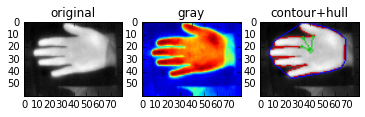

In [207]:
filename='jef_right_01.jpg'
filename='stev_01.jpg'

ori = cv2.imread(filename)
img = cv2.imread(filename)
gray = cv2.imread(filename,0)

#Detect
ret,thresh = cv2.threshold(gray,145,255,1)
contours,h = cv2.findContours(thresh,1,2)

found = False
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    #print len(approx)
    if len(approx)==5:
        print "pentagon"
        #cv2.drawContours(img,[cnt],0,255,-1)
    elif len(approx)==3:
        print "triangle"
        #cv2.drawContours(img,[cnt],0,(0,255,0),-1)
    elif len(approx)==4:
        print "square"
        #cv2.drawContours(img,[cnt],0,(0,0,255),-1)
    elif len(approx) == 9:
        print "half-circle"
        #cv2.drawContours(img,[cnt],0,(255,255,0),-1)
    elif len(approx) > 9:
        found = True
        print "circle"
        hull = cv2.convexHull(cnt)
        #ellipse = cv2.fitEllipse(cnt)
        #cv2.ellipse(img,ellipse,(0,255,0),1)
        cv2.drawContours(img,[cnt]    ,0,(200,0,0), 1)
        cv2.drawContours(img,[hull]   ,0,(0,0,255), 1)
        print "inner(contour)=", len(approx), " outer(hull)=", len(hull)
        #Centroid
        M = cv2.moments(cnt)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        print cx,cy
        cv2.circle(img, (cx,cy), 2, (20,200,20), 1)
        
        ###Calc dist between each point and centroid
        dist_map = {}
        for xy in cnt:
            x = xy[0][0]
            y = xy[0][1]
            dist = math.hypot(cx - x, cy - y)
            dist_map[dist] = xy

        ### Find the distinct nearest N points
        N=3
        anchors_map = {}
        for d in sorted(dist_map):
            if len(anchors_map) >= N:
                break
            x = dist_map[d][0][0]
            y = dist_map[d][0][1]

            #Only take this point if distance from previous anchors
            too_close = False
            for f in anchors_map:
                xPrev = anchors_map[f][0][0]
                yPrev = anchors_map[f][0][1]
                distPrev = math.hypot( xPrev - x, yPrev - y)
                if(distPrev <= 3):
                    too_close = True
                    break

            if(too_close):
                continue
            else:
                #If still looking for points, take this point
                if len(anchors_map) < N:
                    anchors_map[d] = dist_map[d]
        #Draw the anchor lines
        for d in anchors_map:
            closest_xy = (anchors_map[d][0][0],anchors_map[d][0][1])
            cv2.circle(img,closest_xy , 1, (20,200,20), 1)
            cv2.line(img, closest_xy , (cx,cy), (20,200,20), 1)
            #print closest_xy, d
        break
        
####Check detection fail
if found is False:
    print "\n------\nOops... you are too cool!!!"

####Check detection fail
area_cnt = cv2.contourArea(cnt)
area_hull = cv2.contourArea(hull)
print "area_cnt=",area_cnt , ' area_hull=', area_hull

if (found is False) or (area_cnt < 900) or (area_hull > 3500):
    print "\n------\nOops... you are too cool!!!"
else:
    ### Preview
    fig = plt.figure()
    
    a=fig.add_subplot(1,3,1)
    plt.imshow(ori)
    a.set_title('original')

    a=fig.add_subplot(1,3,2)
    plt.imshow(gray)
    a.set_title('gray')

    a=fig.add_subplot(1,3,3)
    plt.imshow(img)
    a.set_title('contour+hull')

    #cv2.imshow('img',img)
    #cv2.waitKey(0)
    cv2.destroyAllWindows()


# Find closest points

In [178]:

###Calc dist between each point and centroid
dist_map = {}
for xy in cnt:
    x = xy[0][0]
    y = xy[0][1]
    dist = math.hypot(cx - x, cy - y)
    dist_map[dist] = xy

### Find the distinct nearest N points
N=4
anchors_map = {}
for d in sorted(dist_map)[:10]:
    if len(anchors_map) >= N:
        break
    x = dist_map[d][0][0]
    y = dist_map[d][0][1]
    
    #Only take this point if distance from previous anchors
    too_close = False
    for f in anchors_map:
        xPrev = anchors_map[f][0][0]
        yPrev = anchors_map[f][0][1]
        distPrev = math.hypot( xPrev - x, yPrev - y)
        if(distPrev <= 3):
            too_close = True
            break
    
    if(too_close):
        continue
    else:
        #If still looking for points, take this point
        if len(anchors_map) < N:
            anchors_map[d] = dist_map[d]
    
for d in anchors_map:
    closest_xy = (anchors_map[d][0][0],anchors_map[d][0][1])
    cv2.circle(img,closest_xy , 1, (20,200,20), 1)
    print closest_xy, d
            

(37, 14) 10.0
(32, 22) 11.0
(35, 21) 8.0622577483
(36, 29) 9.89949493661
